# Visualizing the trough model
This notebook shows some ways to visualize the trough migration path and the underlying model. Two of the figures plot the modeled retreat as a function of time and lag (which is also a function of time).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import mars_troughs as mt
print("Creating a trough object.")
test_acc_params = [1e-8, 5e-9]
acc_model_number = 1
test_lag_params = [1, 1e-5]
lag_model_number = 1
errorbar = 100.
tr = mt.Trough(test_acc_params, test_lag_params,
                acc_model_number, lag_model_number,
                errorbar)

Creating a trough object.


## Retreat slice plot
The retreat as a function of time and lag can be visualized using a heatmap plot. We can show a heatmap of all possible retreats as a function of time and lag $R(t, l(t))$ and then plot the trajectory the trough takes in $(t,l(t))$ space. The top panel shows the retreat value that the model has at that exact time, or the value of the retreat along the white line.

((16, 1501), (16, 1501))


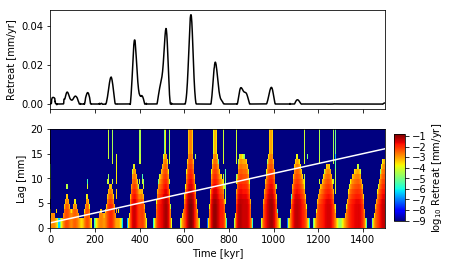

In [3]:
t = tr.ins_times/1e3
l = tr.lags
r = tr.retreats
T,L = np.meshgrid(t,l)
r[r==0] = 1e-9
print(T.shape, L.shape)
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True)
#plt.imshow(r.T, cmap='jet')
#sns.heatmap(np.log10(r))
im = ax[1].pcolormesh(T, L, np.log10(r), cmap='jet')
ax[1].set_xlabel("Time [kyr]")
ax[1].set_ylabel("Lag [mm]")

lm = tr.lags_t
rm = tr.Retreat_model_at_t
ax[1].plot(t, lm, c='white')
ax[0].plot(t, rm, c='k')
ax[0].set_ylabel("Retreat [mm/yr]")
ax[0].set_xlim(min(t),max(t))
cbax = fig.add_axes([0.92, 0.15, 0.025, 0.3])
cbar = fig.colorbar(im, cax=cbax)
cbar.set_label(r"$\log_{10}$ Retreat [mm/yr]")

## Retreat model vs possible retreats
We have on hand the retreat at a series of pre-determined lag values. It is useful to visualize the retreat model in comparison to these possible retreats for the various lag values.

Text(0,0.5,'Retreat [mm/yr]')

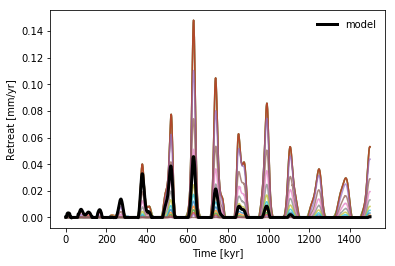

In [4]:
retreats = tr.retreats
for i,li in enumerate(l):
    plt.plot(t, retreats[i], alpha=0.7)
plt.plot(t, rm, c='k', ls='-', lw=3, label='model')
plt.legend(loc=0, frameon=False)
plt.xlabel("Time [kyr]")
plt.ylabel("Retreat [mm/yr]")